In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Данные

In [2]:
data = load_digits()

In [3]:
X = data['data']
y = (data['target'] >= 5).astype(np.int32)

<Figure size 640x480 with 0 Axes>

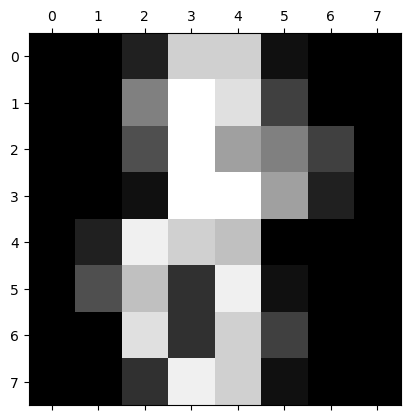

8


In [4]:
plt.gray()
index = np.random.randint(0, len(X) - 1)
plt.matshow(X[index].reshape(8, 8))
plt.show()
print(data.target[index])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.77,
                                                    shuffle=True)

In [6]:
X_train.shape, X_test.shape

((1383, 64), (414, 64))

### Логистическая регрессия

Вычисление предсказания логистической регрессией для объекта $x_i \in \mathbb{R}^n$ :

* $z = w^T x_i + b, \quad w \in \mathbb{R}^n, b \in \mathbb{R}$
* $a = \sigma (z)$

Сигмоида

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

![alt text](https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png)

Логистическая фунция потерь:

$$L_i(a) = -y_i \cdot log(a) - (1 - y_i) \cdot log(1 - a)$$

Производные функции по параметрам:

$$\frac{\partial L_i}{\partial w} = \frac{\partial L_i}{\partial a} \cdot \frac{\partial a}{\partial z}
\cdot \frac{\partial z}{\partial w} = \frac {a - y_i} {a \cdot (1-a)} \cdot a \cdot (1-a) \cdot x_i = (a-y_i) \cdot x_i $$

$$\frac{\partial L_i}{\partial b} = \frac{\partial L_i}{\partial a} \cdot \frac{\partial a}{\partial z}
\cdot \frac{\partial z}{\partial b} = \frac {a - y_i} {a \cdot (1-a)} \cdot a \cdot (1-a) \cdot 1 = a-y_i $$

Используются для минимизации функции потерь $L$ с помощью градиентного спуска.

In [7]:
def log_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred), axis=0) / len(y_true)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
m, n = X_train.shape
print(f'Число объектов в обучающей выборке: {m}\nРазмерность объекта: {n}')

Число объектов в обучающей выборке: 1383
Размерность объекта: 64


## Задание

Реализовать алгоритм градиентного спуска для поиска весов логистической регрессии. Посчитать значение метрики accuracy для полученного прогноза на тестовых данных.

In [9]:
# градиентный спуск
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    
    for i in range(n_iterations):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)
        error = y_pred - y

        dw = (1/m) * np.dot(X.T, error)
        db = (1/m) * np.sum(error)

        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 100 == 0:
            loss = log_loss(y, y_pred)
            print(f'Итерация {i}, Функция потерь: {loss:.3f}')
    
    return w, b

In [10]:
# обучение
print(f'Число объектов в обучающей выборке: {X_train.shape[0]}\nРазмерность объекта: {X_train.shape[1]}')
w, b = gradient_descent(X_train, y_train, learning_rate=0.01, n_iterations=1000)

# предсказание
y_proba = sigmoid(np.dot(X_test, w) + b)
y_pred = (y_proba >= 0.5).astype(int)

# оценка
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy на тестовых данных: {acc:.4f}")

Число объектов в обучающей выборке: 1383
Размерность объекта: 64
Итерация 0, Функция потерь: 0.693
Итерация 100, Функция потерь: 0.350
Итерация 200, Функция потерь: 0.313
Итерация 300, Функция потерь: 0.277
Итерация 400, Функция потерь: 0.261
Итерация 500, Функция потерь: 0.251
Итерация 600, Функция потерь: 0.248
Итерация 700, Функция потерь: 0.245
Итерация 800, Функция потерь: 0.243
Итерация 900, Функция потерь: 0.242

Accuracy на тестовых данных: 0.8768
